In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math

In [37]:
def eulerSIR(parameters, initial):
    
    beta, gamma = parameters
    N, I0, S0 = initial
    
    dt = 0.1
    # lists to store SIR values & initial conditions
    sList = []
    sList.append(S0)
    iList = []
    iList.append(I0)
    rList = []
    rList.append((N-S0-I0))

    # list to store time
    time = np.arange(0, 50, dt).tolist()
    
    for i in range(0,len(time)-1):
        S = sList[-1] - ((beta * sList[-1] * iList[-1])/ N) * dt 
        I = iList[-1] + (((beta * sList[-1] * iList[-1])/ N) - gamma * iList[-1]) * dt 
        R = rList[-1] + (gamma * iList[-1]) * dt 
        sList.append(S)
        iList.append(I)
        rList.append(R)
        
    return((time,sList,iList,rList))
        

In [38]:
def plot(time, sList, iList, rList):
    fig, ax = plt.subplots(nrows=1,ncols=1)
    ax.plot(time,sList,label='S',color="blue")
    ax.plot(time,iList,label='I',color="red")
    ax.plot(time,rList,label='R',color="black")
    ax.legend(loc='center right')
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    ax.set_xlabel('time')
    ax.set_ylabel('population')
    ax.set_title('Didi SIR Plot')

In [39]:
initial = (1000,1,999) # initial conditions (N,I,S)

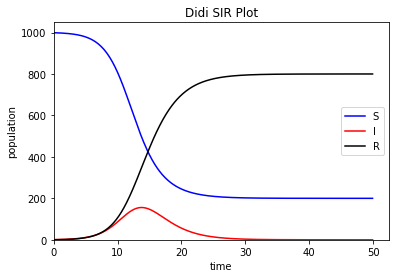

In [40]:
parameters = (1,0.5) # parameters (beta, gamma)
time, sList, iList, rList = eulerSIR(parameters,initial)
plot(time,sList,iList,rList)

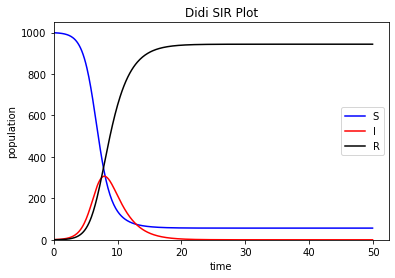

In [41]:
parameters = (1.5 ,0.5) # parameters (beta, gamma)
time, sList, iList, rList = eulerSIR(parameters,initial)
plot(time,sList,iList,rList)

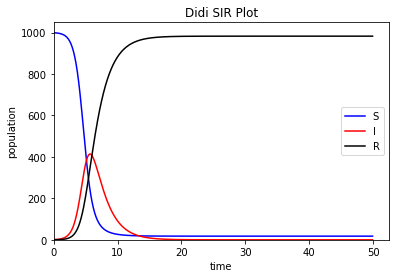

In [42]:
parameters = (2, 0.5) # parameters (beta, gamma)
time, sList, iList, rList = eulerSIR(parameters,initial)
plot(time,sList,iList,rList)

In [43]:
def plot1(k):
    # Creating vectors X and Y
    x = np.linspace(-2, 2, 100)
    y = x 
    y1 = 1 - math.e**(-k*x)

    fig = plt.figure(figsize = (10, 5))
    # Create the plot
    fig, ax = plt.subplots(nrows=1,ncols=1)
    plt.scatter(fsolve(f, [1.0, 2.0])[0],fsolve(f, [1.0, 2.0])[1])
    plt.plot(x, y, color = "black")
    plt.plot(x, y1, color = "red")

    ax.set_xlim(left=-0.1)
    ax.set_ylim(bottom=-0.1)
    ax.set_title(r"$r_{0} = $" + str(k))
    # Show the plot
    plt.show()

[0.31369833 0.31369833]


<Figure size 720x360 with 0 Axes>

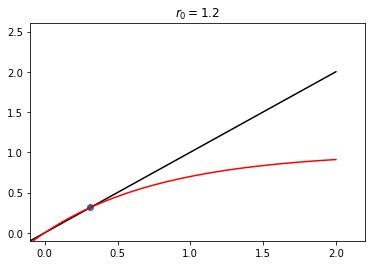

In [44]:
# Question 3
def f(xy):
    x, y = xy
    z = np.array([y - x, y - 1 + (math.e**(-1.2*x))])
    return z

def f2(xy):
    x, y = xy
    z = np.array([y - x, y - 1 + (math.e**(-2*x))])
    return z

print(fsolve(f, [1.0, 2.0]))
plot1(1.2)

In [45]:
def plotWithR(time, sList, iList, rList,R):
    rinf = fsolve(f2, [1.0, 2.0])[0]
    y = rinf
    fig, ax = plt.subplots(nrows=1,ncols=1)
    ax.plot(time,sList,label='S',color="blue")
    ax.plot(time,iList,label='I',color="red")
    ax.plot(time,rList,label='R',color="black")
    plt.axhline(y = rinf*1000, color = '#00C957', linestyle = 'dotted',linewidth=3)
    ax.legend(loc='center right')
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    ax.set_xlabel('time')
    ax.set_ylabel('population')
    ax.set_title('Didi SIR Plot \n' + r' $r_{0} = 2$')

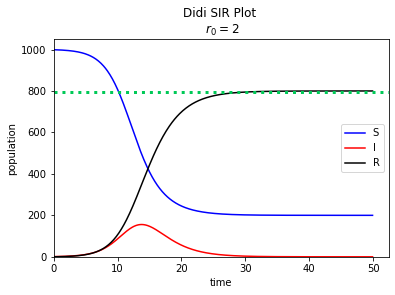

In [46]:
parameters = (1,0.5) # parameters (beta, gamma), #R0 = 2
time, sList, iList, rList = eulerSIR(parameters,initial)
plotWithR(time,sList,iList,rList,2)